In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def cv_show(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
def cv2_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

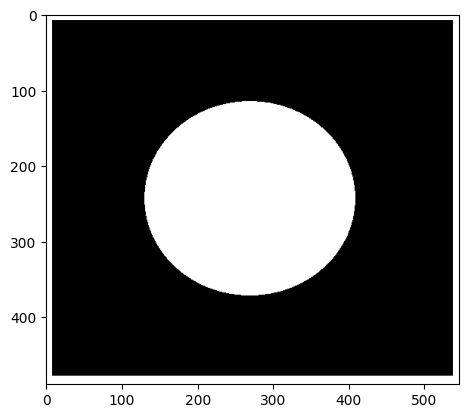

In [2]:
pie = cv2.imread('01_Picture/06_pie.png')
cv_show(pie)

In [6]:
# 白到黑是整数，黑到白是负数了，所有的负数会被截断成 0，所以要取绝对值
sobelx = cv2.Sobel(pie,cv2.CV_64F,1,0,ksize=3) # 1,0 表示只算水平方向梯度
cv2_show(sobelx, 'sobelx')

In [18]:
sobelx = cv2.Sobel(pie,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx) # 取负数时，取绝对值
cv2_show(sobelx, 'sobelx')

In [19]:
sobely = cv2.Sobel(pie,cv2.CV_64F,0,1,ksize=3) # 1,0 只算 y 方向梯度
sobely = cv2.convertScaleAbs(sobely) # 取负数时，取绝对值
cv2_show(sobely, 'sobely')

In [20]:
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0) # 0是偏置项
cv2_show(sobelxy, "sobelxy")

In [14]:
print(sobelx.shape)
print(sobely.shape)

(489, 546, 3)
(489, 546, 3)


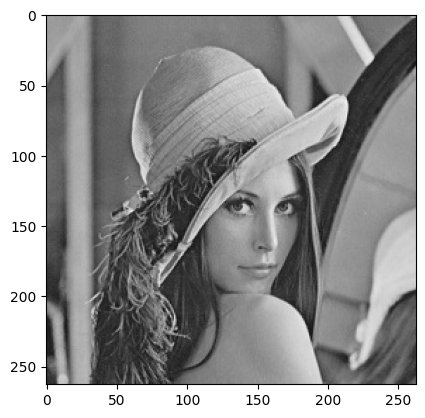

In [21]:
img = cv2.imread('01_Picture/07_Lena.jpg',cv2.IMREAD_GRAYSCALE)
cv_show(img)

In [27]:
sobelx = cv2.Sobel(img,cv2.CV_64F, 1, 0, ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img,cv2.CV_64F, 0, 1, ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
cv2_show(sobelxy, 'sobelxy')

In [23]:
# 整体计算有重影和模糊，不建议整体计算
sobelxy = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=3)
sobelxy = cv2.convertScaleAbs(sobelxy)
cv2_show(sobelxy, 'sobelxy')

In [28]:
scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)
scharrx = cv2.convertScaleAbs(scharrx)
scharry = cv2.Scharr(img,cv2.CV_64F,0,1)
scharry = cv2.convertScaleAbs(scharry)
scharryxy = cv2.addWeighted(scharrx, 0.5, scharry, 0.5, 0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

res = np.hstack((sobelxy,scharry,laplacian))
cv2_show(res,'res')
